In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
len(df.columns)

81

In [5]:
num_vars = [var for var in df.columns if df[var].dtype != 'O' ]

In [6]:
cat_vars = [var for var in df.columns if df[var].dtype == 'O' ]

In [7]:
temporal_vars = [var for var in df.columns if 'Yr' in var or 'Year' in var]

In [8]:
continuous_num_vars = [var for var in df[num_vars] if df[var].nunique()>20 and var not in temporal_vars+['Id']]

In [9]:
discrete_num_vars = [var for var in df[num_vars] if df[var].nunique()<20 and var not in temporal_vars+['Id']]

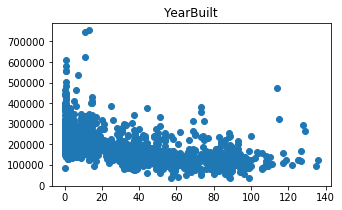

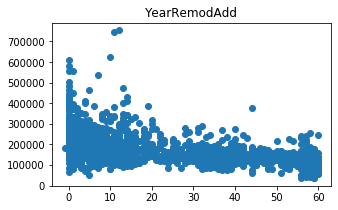

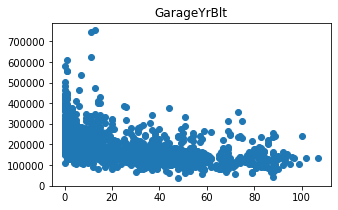

In [10]:
def analyse_temporal_vars(df,var):
    df=df.copy()
    if var != 'YrSold':
        df[var] = df['YrSold']-df[var]
        plt.figure(figsize=(5,3))
        plt.scatter(df[var],df['SalePrice'])
        plt.title(var)
    
for var in temporal_vars:
    analyse_temporal_vars(df,var)
    df[var]

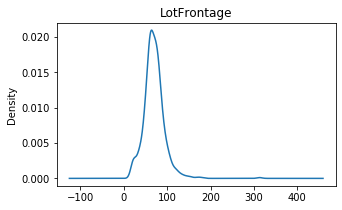

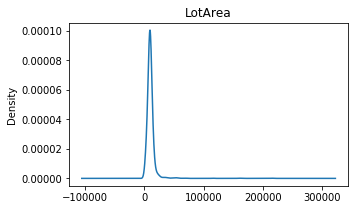

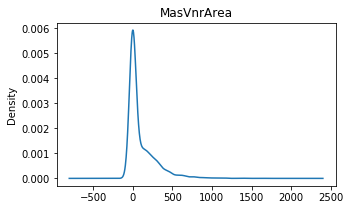

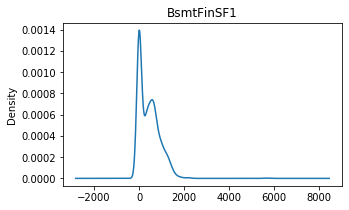

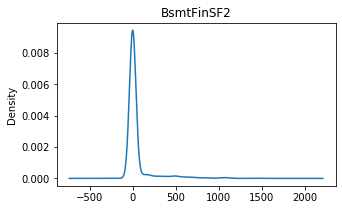

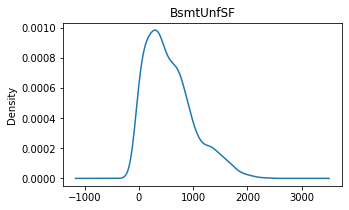

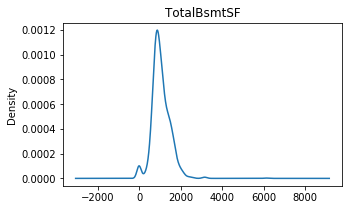

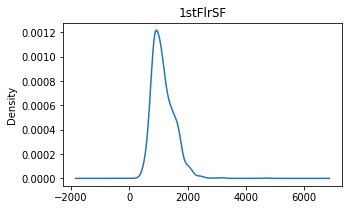

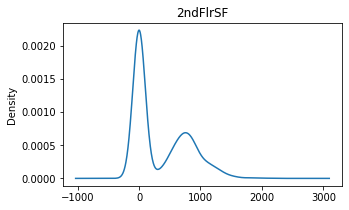

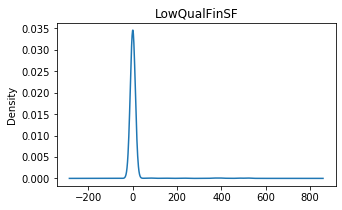

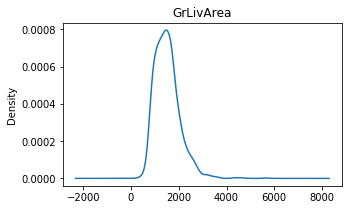

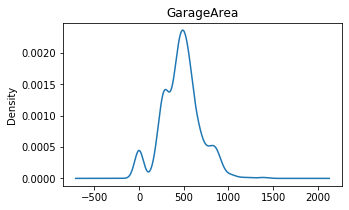

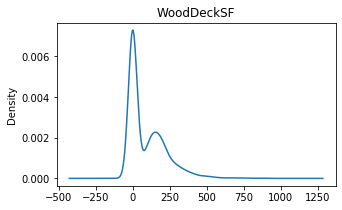

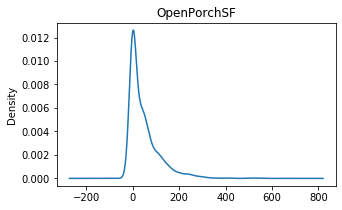

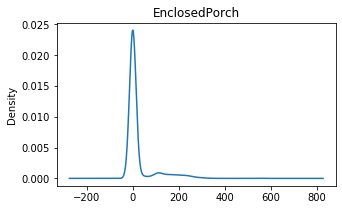

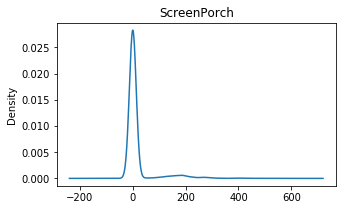

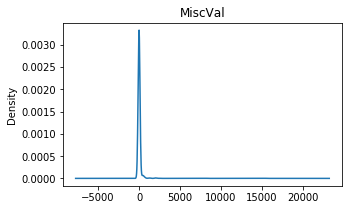

In [11]:
#analyse distribution
def analyse_continuous_num_vars(df,var):
    df=df.copy()
    
    plt.figure(figsize=(5,3))
    df[var].plot.kde()
    plt.title(var)

for var in continuous_num_vars:
    if var != 'SalePrice':
        analyse_continuous_num_vars(df,var)

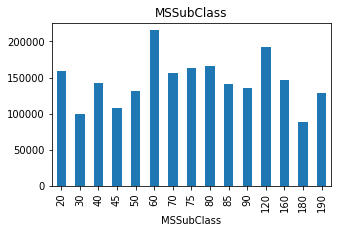

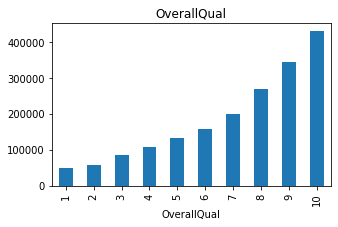

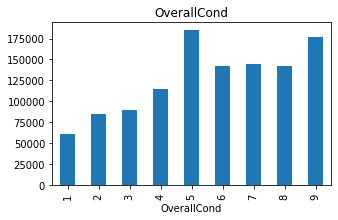

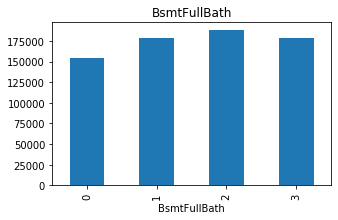

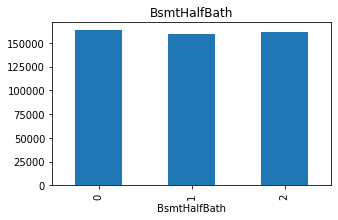

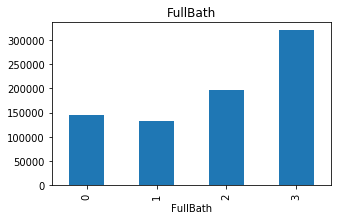

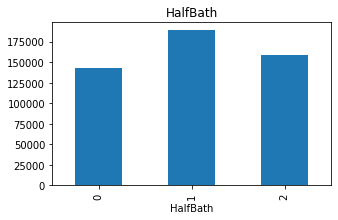

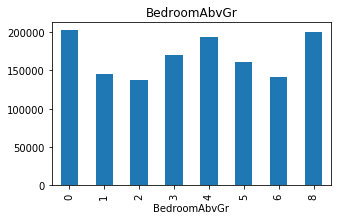

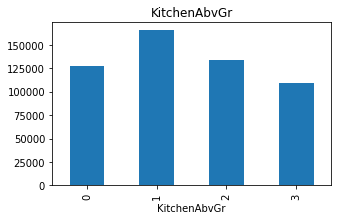

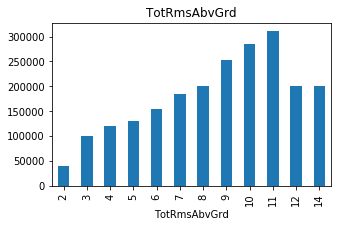

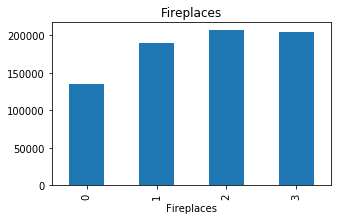

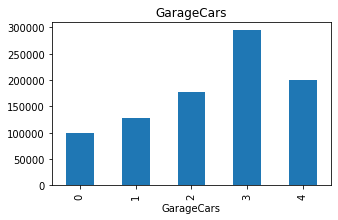

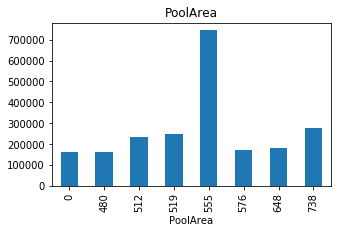

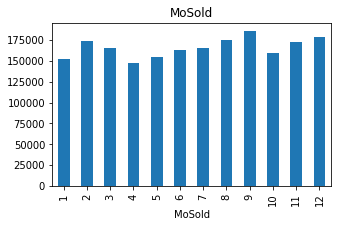

In [12]:
#analyse distribution
def analyse_discrete_num_vars(df,var):
    df = df.copy()
    
    plt.figure(figsize=(5,3))
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)

for var in discrete_num_vars:
    analyse_discrete_num_vars(df,var)

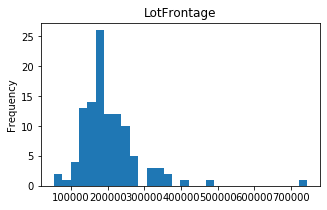

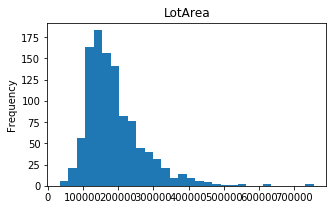

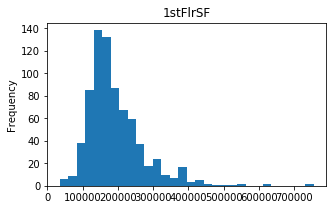

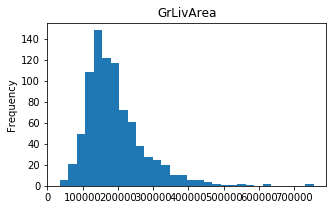

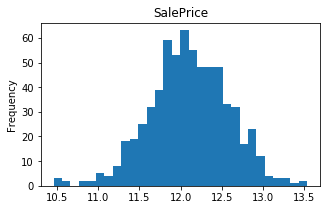

In [13]:
def analyse_transformed_continuous_vars(df,var):
    df = df.copy()
    
    if any(df[var] <=0):
        pass
    else:  
        df[var] = np.log(df[var])

        plt.figure(figsize=(5,3))
        df.groupby(var)['SalePrice'].median().plot.hist(bins=30)
        plt.title(var)

for var in continuous_num_vars:
    analyse_transformed_continuous_vars(df,var)

C:\Users\Prestela\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Prestela\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Prestela\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different len

C:\Users\Prestela\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Prestela\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Prestela\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different len

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000170B8EDCA60> (for post_execute):


KeyboardInterrupt: 

<Figure size 360x216 with 0 Axes>

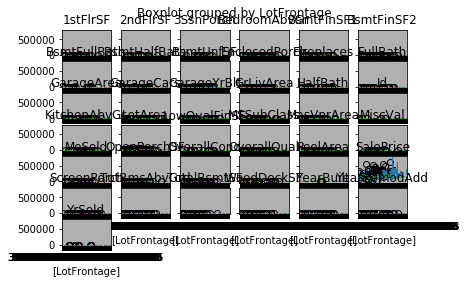

<Figure size 360x216 with 0 Axes>

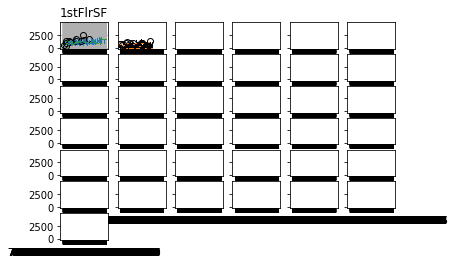

In [14]:
def analyse_outliers(df,var):
    df = df.copy()
    
    if any(df[var] <=0):
        pass
    else:
        df[var]=np.log(df[var])
        
        plt.figure(figsize=(5,3))
        df.boxplot(by=var)
        plt.title(var)
        
for var in continuous_num_vars:
    analyse_outliers(df,var)

In [ ]:
#analyse categorical variables
#df[cat_vars].nunique()

In [ ]:
#analyse rare labels
def rare_labels(df,var,rare_perc=0.05):
    df=df.copy()
    tmp=df.groupby(var)['SalePrice'].count()/len(df)
    return tmp[tmp>rare_perc]

In [ ]:
for var in cat_vars:
    print(rare_labels(df,var))
    

In [ ]:
for var in cat_vars:
    discrete_vars()

In [ ]:
df.corr()['SalePrice'].sort_values()